In [8]:
import pandas as pd
import numpy as np

def load_and_prepare_data(actual_file, pred_file):
    actual_df = pd.read_csv(actual_file)
    pred_df = pd.read_csv(pred_file)
    min_rows = min(len(actual_df), len(pred_df))
    actual_df = actual_df.head(min_rows)
    pred_df = pred_df.head(min_rows)
    return actual_df, pred_df

def calculate_field_accuracy(actual_df, pred_df):
    fields = [
        'Section_Number_1', 'Subsection_1', 'Paragraph_1', 'Subparagraph_1',
        'Section_Number_2', 'Subsection_2', 'Paragraph_2', 'Subparagraph_2',
        'Section_Number_3', 'Subsection_3', 'Paragraph_3', 'Subparagraph_3'
    ]
    accuracy = {}
    for field in fields:
        if field in actual_df.columns and field in pred_df.columns:
            actual = actual_df[field].fillna('')
            pred = pred_df[field].fillna('')
            matches = (actual == pred).sum()
            total = len(actual)
            accuracy[field] = {
                'accuracy': matches / total * 100,
                'matches': matches,
                'total': total
            }
    return accuracy

def calculate_section_accuracy(actual_df, pred_df):
    section_acc = {}
    for i in range(1, 4):
        fields = [f'Section_Number_{i}', f'Subsection_{i}', f'Paragraph_{i}', f'Subparagraph_{i}']
        matches = 0
        total = len(actual_df)
        for idx in range(total):
            if all(
                str(actual_df.iloc[idx][f]).strip() == str(pred_df.iloc[idx][f]).strip()
                if (f in actual_df.columns and f in pred_df.columns)
                else False
                for f in fields
            ):
                matches += 1
        section_acc[f'Section_{i}'] = {
            'accuracy': matches / total * 100,
            'matches': matches,
            'total': total
        }
    return section_acc

def calculate_overall_accuracy(actual_df, pred_df):
    fields = [
        'Section_Number_1', 'Subsection_1', 'Paragraph_1', 'Subparagraph_1',
        'Section_Number_2', 'Subsection_2', 'Paragraph_2', 'Subparagraph_2',
        'Section_Number_3', 'Subsection_3', 'Paragraph_3', 'Subparagraph_3'
    ]
    matches = 0
    total = len(actual_df)
    for idx in range(total):
        if all(
            str(actual_df.iloc[idx][f]).strip() == str(pred_df.iloc[idx][f]).strip()
            if (f in actual_df.columns and f in pred_df.columns)
            else False
            for f in fields
        ):
            matches += 1
    return matches / total * 100, matches, total

def print_results(field_acc, section_acc, overall_acc, matches, total):
    print("Field-wise Accuracy:")
    for k, v in field_acc.items():
        print(f"{k}: {v['accuracy']:.2f}% ({v['matches']}/{v['total']})")
    print("\nSection-wise Accuracy:")
    for k, v in section_acc.items():
        print(f"{k}: {v['accuracy']:.2f}% ({v['matches']}/{v['total']})")
    print(f"\nOverall Accuracy (all fields match): {overall_acc:.2f}% ({matches}/{total})")

if __name__ == "__main__":
    actual_file = "actualValueData.csv"
    pred_file = "predValueData.csv"
    actual_df, pred_df = load_and_prepare_data(actual_file, pred_file)
    field_acc = calculate_field_accuracy(actual_df, pred_df)
    section_acc = calculate_section_accuracy(actual_df, pred_df)
    overall_acc, matches, total = calculate_overall_accuracy(actual_df, pred_df)
    print_results(field_acc, section_acc, overall_acc, matches, total)

Field-wise Accuracy:
Section_Number_1: 98.33% (295/300)
Subsection_1: 99.33% (298/300)
Paragraph_1: 100.00% (300/300)
Subparagraph_1: 100.00% (300/300)
Section_Number_2: 100.00% (300/300)
Subsection_2: 100.00% (300/300)
Paragraph_2: 100.00% (300/300)
Subparagraph_2: 100.00% (300/300)
Section_Number_3: 99.33% (298/300)
Subsection_3: 100.00% (300/300)
Paragraph_3: 100.00% (300/300)
Subparagraph_3: 100.00% (300/300)

Section-wise Accuracy:
Section_1: 98.00% (294/300)
Section_2: 100.00% (300/300)
Section_3: 99.33% (298/300)

Overall Accuracy (all fields match): 97.33% (292/300)


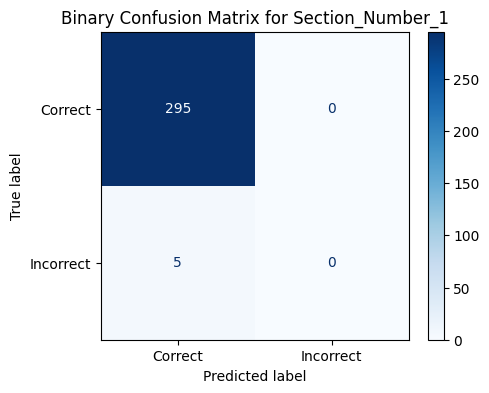

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def plot_binary_confusion_for_field(actual_df, pred_df, field):
    if field in actual_df.columns and field in pred_df.columns:
        y_true = actual_df[field].fillna('').astype(str)
        y_pred = pred_df[field].fillna('').astype(str)
        # Create binary labels: 'Correct' if match, 'Incorrect' otherwise
        binary_true = ['Correct' if a == p else 'Incorrect' for a, p in zip(y_true, y_pred)]
        binary_pred = ['Correct'] * len(y_true)  # Model always predicts its own output as 'Correct'
        # For confusion matrix, compare actual correctness vs. predicted correctness
        cm = confusion_matrix(binary_true, binary_pred, labels=['Correct', 'Incorrect'])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Correct', 'Incorrect'])
        fig, ax = plt.subplots(figsize=(5, 4))
        disp.plot(ax=ax, cmap='Blues')
        plt.title(f'Binary Confusion Matrix for {field}')
        plt.show()
    else:
        print(f"Field {field} not found in both dataframes.")

# Example usage:
plot_binary_confusion_for_field(actual_df, pred_df, 'Section_Number_1')

Grouped Field Accuracy:
Section_Number: 97.67% (293/300)
Subsection: 99.33% (298/300)
Paragraph: 100.00% (300/300)
Subparagraph: 100.00% (300/300)


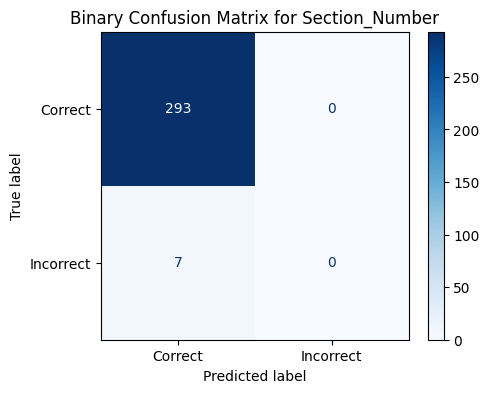

In [10]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def load_and_prepare_data(actual_file, pred_file):
    actual_df = pd.read_csv(actual_file)
    pred_df = pd.read_csv(pred_file)
    min_rows = min(len(actual_df), len(pred_df))
    actual_df = actual_df.head(min_rows)
    pred_df = pred_df.head(min_rows)
    return actual_df, pred_df

def calculate_grouped_accuracy(actual_df, pred_df):
    # List of field types (without suffix)
    field_types = ['Section_Number', 'Subsection', 'Paragraph', 'Subparagraph']
    results = {}
    for field_type in field_types:
        # Find all columns for this field type (e.g., Section_Number_1, Section_Number_2, ...)
        actual_cols = [col for col in actual_df.columns if col.startswith(field_type)]
        pred_cols = [col for col in pred_df.columns if col.startswith(field_type)]
        # Concatenate all values for each row
        actual_combined = actual_df[actual_cols].fillna('').astype(str).agg('-'.join, axis=1)
        pred_combined = pred_df[pred_cols].fillna('').astype(str).agg('-'.join, axis=1)
        matches = (actual_combined == pred_combined).sum()
        total = len(actual_combined)
        results[field_type] = {
            'accuracy': matches / total * 100,
            'matches': matches,
            'total': total
        }
    return results

def plot_grouped_binary_confusion(actual_df, pred_df, field_type):
    # Find all columns for this field type
    actual_cols = [col for col in actual_df.columns if col.startswith(field_type)]
    pred_cols = [col for col in pred_df.columns if col.startswith(field_type)]
    actual_combined = actual_df[actual_cols].fillna('').astype(str).agg('-'.join, axis=1)
    pred_combined = pred_df[pred_cols].fillna('').astype(str).agg('-'.join, axis=1)
    # Binary labels
    binary_true = ['Correct' if a == p else 'Incorrect' for a, p in zip(actual_combined, pred_combined)]
    binary_pred = ['Correct'] * len(binary_true)
    cm = confusion_matrix(binary_true, binary_pred, labels=['Correct', 'Incorrect'])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Correct', 'Incorrect'])
    fig, ax = plt.subplots(figsize=(5, 4))
    disp.plot(ax=ax, cmap='Blues')
    plt.title(f'Binary Confusion Matrix for {field_type}')
    plt.show()

if __name__ == "__main__":
    actual_file = "actualValueData.csv"
    pred_file = "predValueData.csv"
    actual_df, pred_df = load_and_prepare_data(actual_file, pred_file)
    grouped_acc = calculate_grouped_accuracy(actual_df, pred_df)
    print("Grouped Field Accuracy:")
    for k, v in grouped_acc.items():
        print(f"{k}: {v['accuracy']:.2f}% ({v['matches']}/{v['total']})")
    # Example: plot confusion for Section_Number group
    plot_grouped_binary_confusion(actual_df, pred_df, 'Section_Number')

Overall Accuracy (all fields match): 97.33% (292/300)


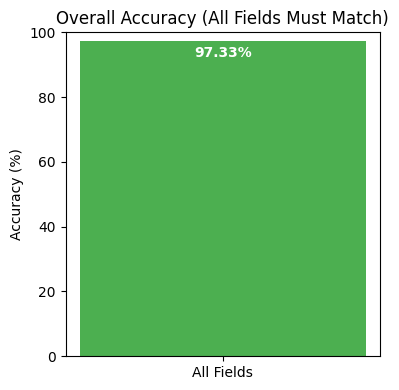

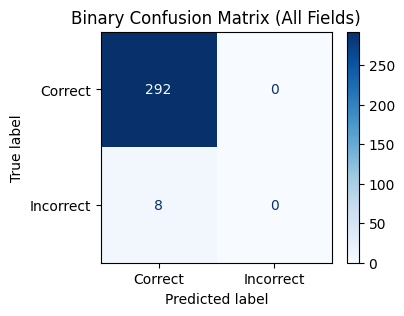

In [11]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def load_and_prepare_data(actual_file, pred_file):
    actual_df = pd.read_csv(actual_file)
    pred_df = pd.read_csv(pred_file)
    min_rows = min(len(actual_df), len(pred_df))
    actual_df = actual_df.head(min_rows)
    pred_df = pred_df.head(min_rows)
    return actual_df, pred_df

def calculate_all_fields_accuracy(actual_df, pred_df):
    # Collect all columns for the 4 field types
    field_types = ['Section_Number', 'Subsection', 'Paragraph', 'Subparagraph']
    actual_cols = [col for ft in field_types for col in actual_df.columns if col.startswith(ft)]
    pred_cols = [col for ft in field_types for col in pred_df.columns if col.startswith(ft)]
    # Concatenate all values for each row
    actual_combined = actual_df[actual_cols].fillna('').astype(str).agg('-'.join, axis=1)
    pred_combined = pred_df[pred_cols].fillna('').astype(str).agg('-'.join, axis=1)
    matches = (actual_combined == pred_combined).sum()
    total = len(actual_combined)
    accuracy = matches / total * 100
    return accuracy, matches, total, actual_combined, pred_combined

def plot_overall_accuracy_bar(accuracy):
    plt.figure(figsize=(4, 4))
    plt.bar(['All Fields'], [accuracy], color='#4CAF50')
    plt.ylabel('Accuracy (%)')
    plt.ylim(0, 100)
    plt.title('Overall Accuracy (All Fields Must Match)')
    plt.text(0, accuracy - 5, f"{accuracy:.2f}%", ha='center', color='white', fontweight='bold')
    plt.tight_layout()
    plt.show()

def plot_overall_binary_confusion(actual_combined, pred_combined):
    binary_true = ['Correct' if a == p else 'Incorrect' for a, p in zip(actual_combined, pred_combined)]
    binary_pred = ['Correct'] * len(binary_true)
    cm = confusion_matrix(binary_true, binary_pred, labels=['Correct', 'Incorrect'])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Correct', 'Incorrect'])
    fig, ax = plt.subplots(figsize=(4, 3))
    disp.plot(ax=ax, cmap='Blues')
    plt.title('Binary Confusion Matrix (All Fields)')
    plt.show()

# Usage
actual_file = "actualValueData.csv"
pred_file = "predValueData.csv"
actual_df, pred_df = load_and_prepare_data(actual_file, pred_file)
accuracy, matches, total, actual_combined, pred_combined = calculate_all_fields_accuracy(actual_df, pred_df)
print(f"Overall Accuracy (all fields match): {accuracy:.2f}% ({matches}/{total})")

plot_overall_accuracy_bar(accuracy)
plot_overall_binary_confusion(actual_combined, pred_combined)

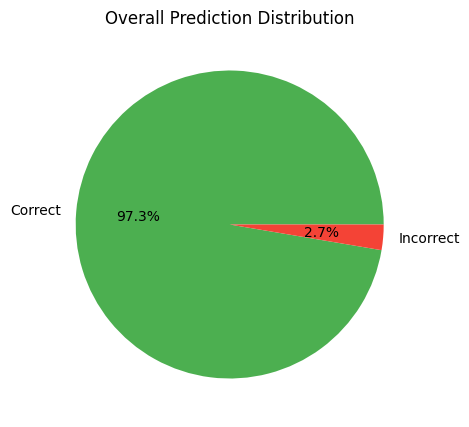

In [12]:
def plot_overall_pie(matches, total):
    incorrect = total - matches
    plt.figure(figsize=(5, 5))
    plt.pie([matches, incorrect], labels=['Correct', 'Incorrect'], autopct='%1.1f%%', colors=['#4CAF50', '#F44336'])
    plt.title('Overall Prediction Distribution')
    plt.show()

# Usage:
plot_overall_pie(matches, total)